<a href="https://colab.research.google.com/github/sachsac/teaching_data/blob/main/TA_Hours_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install openpyxl==3.0.0

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('/content/drive/MyDrive/Work/Independent Projects/TA work/TA helping.xlsx', usecols=['Cohort', 'Stack', 'Day of week','Time in Military', 'Off Hours Request? Y/N'])
df.head()

,Cohort,Stack,Day of week,Time in Military,Off Hours Request? Y/N
0,8/30,Advanced Machine Learning,Wed,1800,No
1,10/11,Machine Learning,Wed,1936,No
2,8/30,Advanced Machine Learning,Thu,1405,Yes
3,8/30,Advanced Machine Learning,Sun,2240,Yes
4,8/30,Advanced Machine Learning,Sun,2011,Yes


In [4]:
#how much of a sample size do we have?
df.info() # number of entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cohort                  79 non-null     object
 1   Stack                   79 non-null     object
 2   Day of week             79 non-null     object
 3   Time in Military        79 non-null     int64 
 4   Off Hours Request? Y/N  79 non-null     object
dtypes: int64(1), object(4)
memory usage: 3.2+ KB


# Day analysis

In [5]:
#my preferred style
plt.style.use('seaborn')

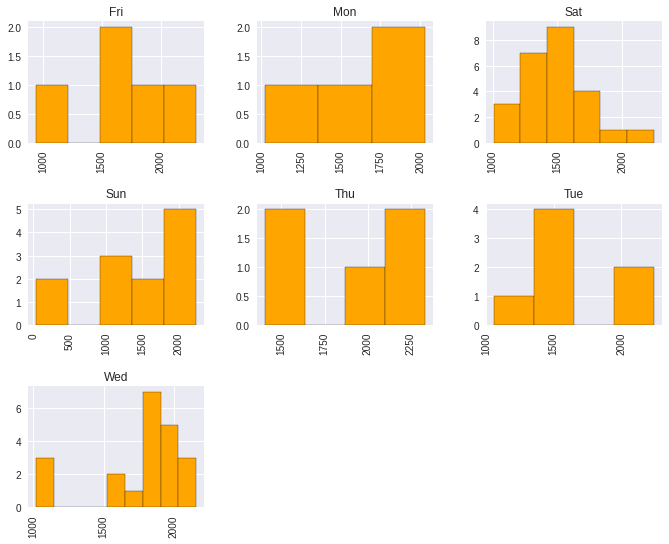

In [6]:
plt.rcParams["figure.figsize"] = (11, 9)
df['Time in Military'].hist(by = df['Day of week'], bins = 'auto', color = 'orange', edgecolor = 'black');

Note there is no Tuesday, as of 1/23/2022, no one has contacted me on a Tuesday.

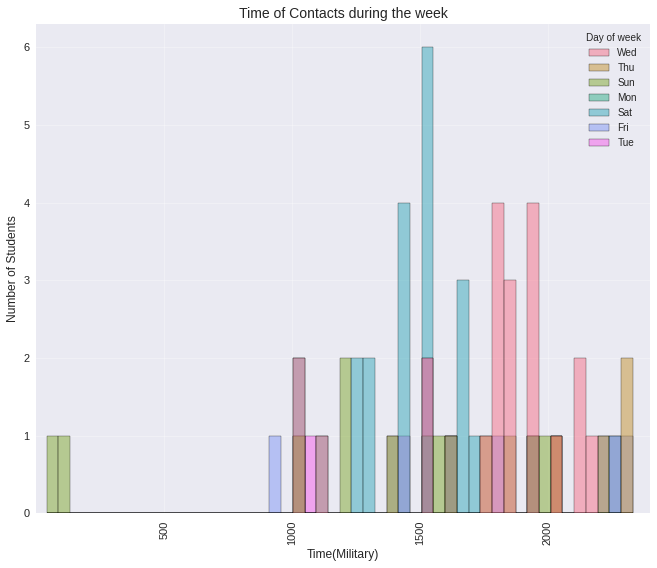

In [7]:
sns.histplot(data = df, x='Time in Military',hue = "Day of week", bins = 50)
plt.grid(alpha = 0.3)
plt.xlim(.5, 2400)
plt.xticks(rotation = 90, fontsize = 11)
plt.yticks(fontsize = 11)
plt.xlabel('Time(Military)', fontsize = 12)
plt.ylabel('Number of Students', fontsize = 12)
plt.title ('Time of Contacts during the week', fontsize = 14);

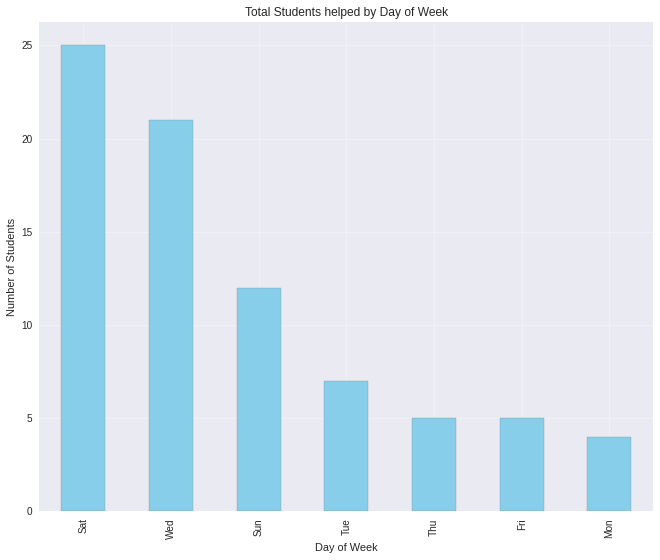

In [8]:
df['Day of week'].value_counts().plot(kind= 'bar', color= 'skyblue', edgecolor = 'gray')
plt.title('Total Students helped by Day of Week')
plt.ylabel('Number of Students')
plt.xlabel('Day of Week')
plt.grid(alpha = 0.3);

## Specific Day Analysis

In [9]:
thursdays = df[df['Day of week'] == 'Thu']
thursdays.head()

,Cohort,Stack,Day of week,Time in Military,Off Hours Request? Y/N
2,8/30,Advanced Machine Learning,Thu,1405,Yes
20,10/11,Machine Learning,Thu,2305,No
27,11/29,Data Fundamentals,Thu,2057,No
32,10/11,Advanced Machine Learning,Thu,1616,Yes
34,10/11,Advanced Machine Learning,Thu,2332,No


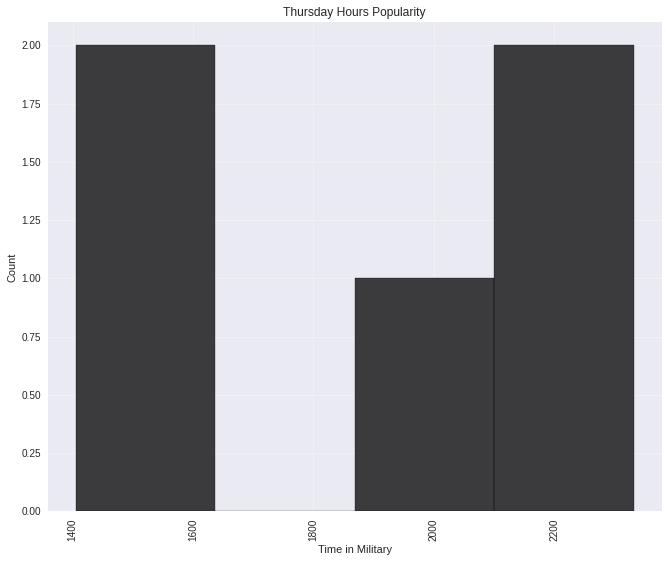

In [10]:
sns.histplot(data = thursdays, x='Time in Military', bins = 'auto', color='black')
plt.xticks(rotation = 90)
plt.grid(alpha = 0.3)
plt.title('Thursday Hours Popularity');

In [11]:
wednesdays = df[df['Day of week'] == 'Wed']
wednesdays.head()

,Cohort,Stack,Day of week,Time in Military,Off Hours Request? Y/N
0,8/30,Advanced Machine Learning,Wed,1800,No
1,10/11,Machine Learning,Wed,1936,No
7,8/30,Advanced Machine Learning,Wed,1822,No
11,10/11,Machine Learning,Wed,1752,No
12,11/29,Data Fundamentals,Wed,1120,No


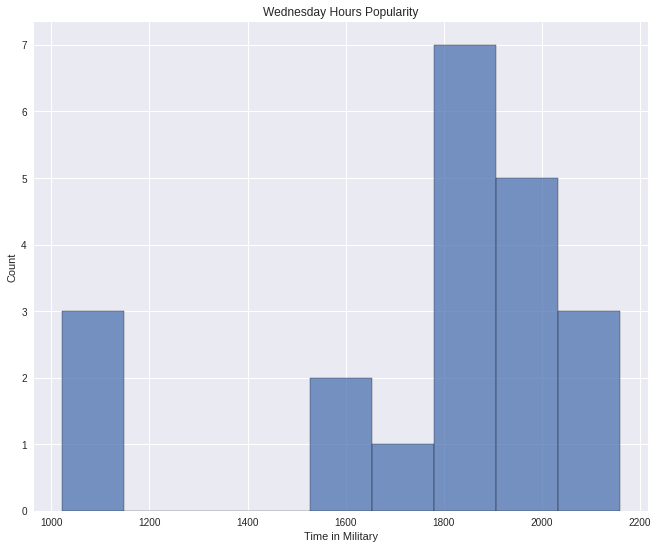

In [12]:
sns.histplot(data = wednesdays, x='Time in Military', bins =  'auto')
plt.title('Wednesday Hours Popularity');

,Cohort,Stack,Day of week,Time in Military,Off Hours Request? Y/N
9,10/11,Machine Learning,Sat,1650,No
10,11/29,Data Fundamentals,Sat,1517,No
14,11/29,Data Fundamentals,Sat,1623,No
21,10/11,Machine Learning,Sat,1513,No
22,11/29,Data Fundamentals,Sat,1651,No


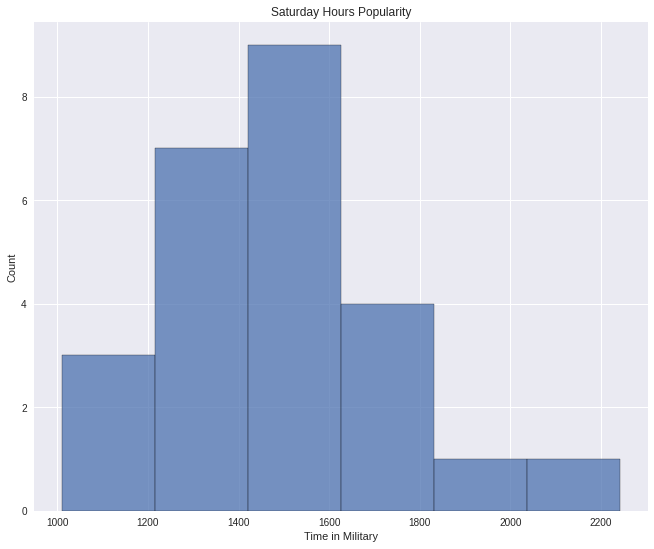

In [13]:
saturdays = df[df['Day of week'] == 'Sat']
display(saturdays.head())

sns.histplot(data = saturdays, x='Time in Military', bins =  'auto')
plt.title('Saturday Hours Popularity');

# By Cohort

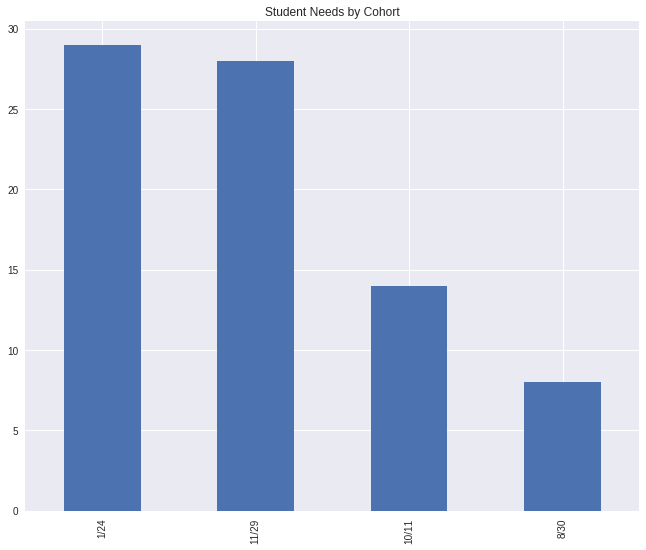

In [14]:
#remove the unknowns
df1 = df[df['Cohort']!= 'Unknown']
df1['Cohort'].value_counts().plot(kind='bar')
plt.title('Student Needs by Cohort');

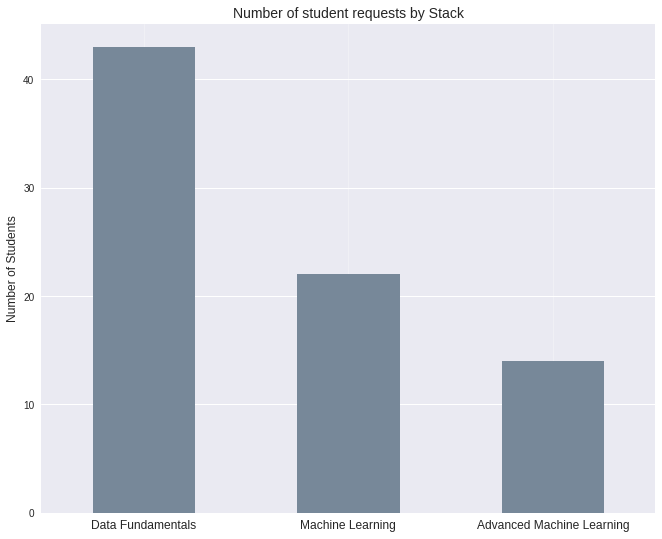

In [15]:
df['Stack'].value_counts().plot(kind='bar', color = 'lightslategray')
plt.title('Number of student requests by Stack', fontsize = 14)
plt.xticks(rotation = 0, fontsize = 12)
plt.ylabel('Number of Students', fontsize = 12)
plt.grid(axis = 'x', alpha = 0.3);

# Off hours contact

In [16]:
new_df = df['Off Hours Request? Y/N'].value_counts(normalize=True)
new_df = new_df.mul(100).rename('Percent').reset_index()
new_df
#https://medium.com/swlh/how-to-create-percentage-plots-for-visualizing-your-data-in-python-f0d894d7c7bb

,index,Percent
0,Yes,50.632911
1,No,49.367089


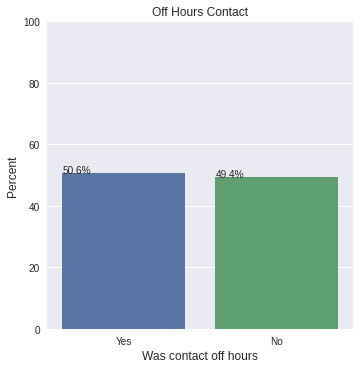

In [17]:
g = sns.catplot(x='index', y='Percent', kind='bar', data=new_df)
plt.title('Off Hours Contact')
plt.xlabel('Was contact off hours', fontsize = 12)
for p in g.ax.patches:
    txt = str(p.get_height().round(1)) + '%'
    txt_x = p.get_x()
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.ylabel('Percent', fontsize = 12)    
plt.rcParams.update({'font.size': 12})
plt.ylim(0,100);
#https://medium.com/swlh/how-to-create-percentage-plots-for-visualizing-your-data-in-python-f0d894d7c7bb

Shockingly, contact is almost 50/50 regarding if a student asks a TA for help during their hours. The majority of contact actually during off hours.

# [Model in a separate Colab](https://colab.research.google.com/drive/1yS7gVKGAI_-aj19BhInKspsJRKMtvmMt?usp=sharing)